In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
df = pd.read_csv('/content/literacy_rate.csv')
df.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,adult_education_programs,language_diversity,region_type,government_stability,literacy_rate_percent
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,NaN,NaN,Bilingual,Least Developed,High,66.516441
1,7.281657,64.538697,50606.686295,737.794798,0.524418,NaN,90.197009,0.500205,Extensive,Multilingual,Least Developed,NaN,85.431091
2,3.833110,63.533592,53415.197757,NaN,0.855385,16.078349,60.915648,0.921771,NaN,Monolingual,Developing,Low,67.063415
3,NaN,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,Limited,NaN,Developing,High,58.288996
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,Extensive,NaN,Least Developed,Low,87.016369


In [ ]:
df.shape


(1000, 13)

In [ ]:
df.columns


Index(['education_spending_percent_gdp', 'urbanization_rate', 'avg_income_usd',
       'population_density', 'school_availability_index',
       'teacher_student_ratio', 'internet_penetration',
       'gender_equality_index', 'adult_education_programs',
       'language_diversity', 'region_type', 'government_stability',
       'literacy_rate_percent'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
education_spending_percent_gdp,52
urbanization_rate,39
avg_income_usd,52
population_density,52
school_availability_index,42
teacher_student_ratio,40
internet_penetration,44
gender_equality_index,46
adult_education_programs,342
language_diversity,59


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [ ]:
df.isnull().sum()


,0
education_spending_percent_gdp,0
urbanization_rate,0
avg_income_usd,0
population_density,0
school_availability_index,0
teacher_student_ratio,0
internet_penetration,0
gender_equality_index,0
adult_education_programs,0
language_diversity,0


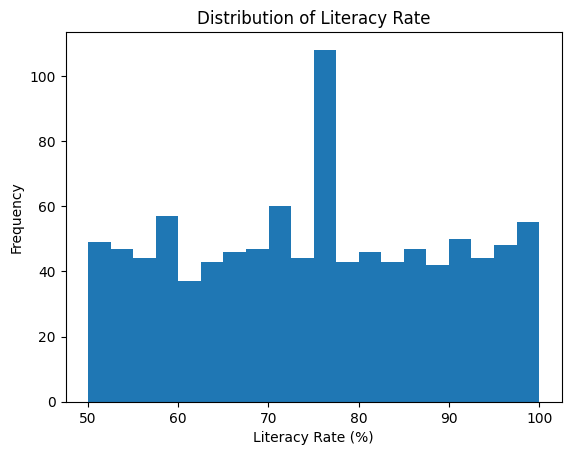

In [ ]:
plt.figure()
plt.hist(df['literacy_rate_percent'], bins=20)
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Literacy Rate")
plt.show()


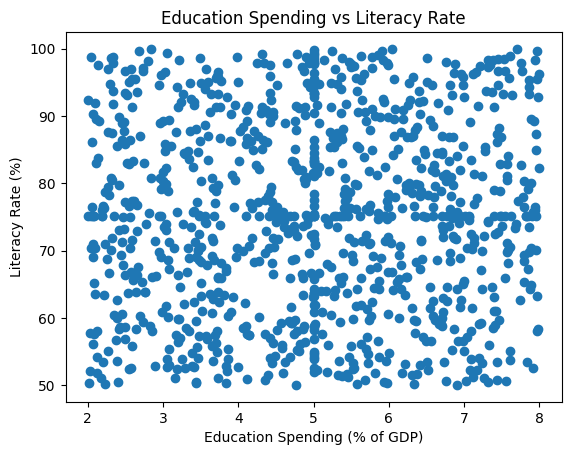

In [ ]:
plt.figure()
plt.scatter(df['education_spending_percent_gdp'], df['literacy_rate_percent'])
plt.xlabel("Education Spending (% of GDP)")
plt.ylabel("Literacy Rate (%)")
plt.title("Education Spending vs Literacy Rate")
plt.show()


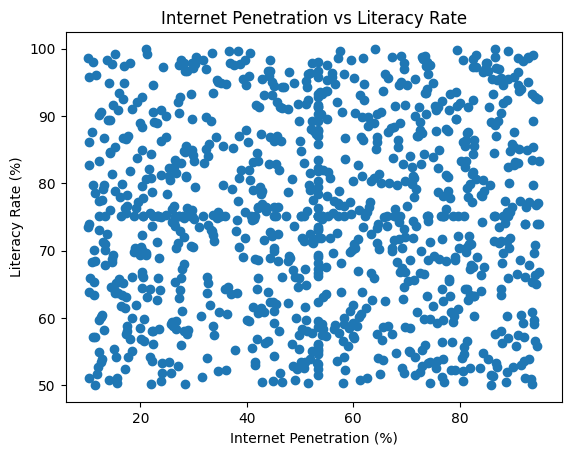

In [ ]:
plt.figure()
plt.scatter(df['internet_penetration'], df['literacy_rate_percent'])
plt.xlabel("Internet Penetration (%)")
plt.ylabel("Literacy Rate (%)")
plt.title("Internet Penetration vs Literacy Rate")
plt.show()


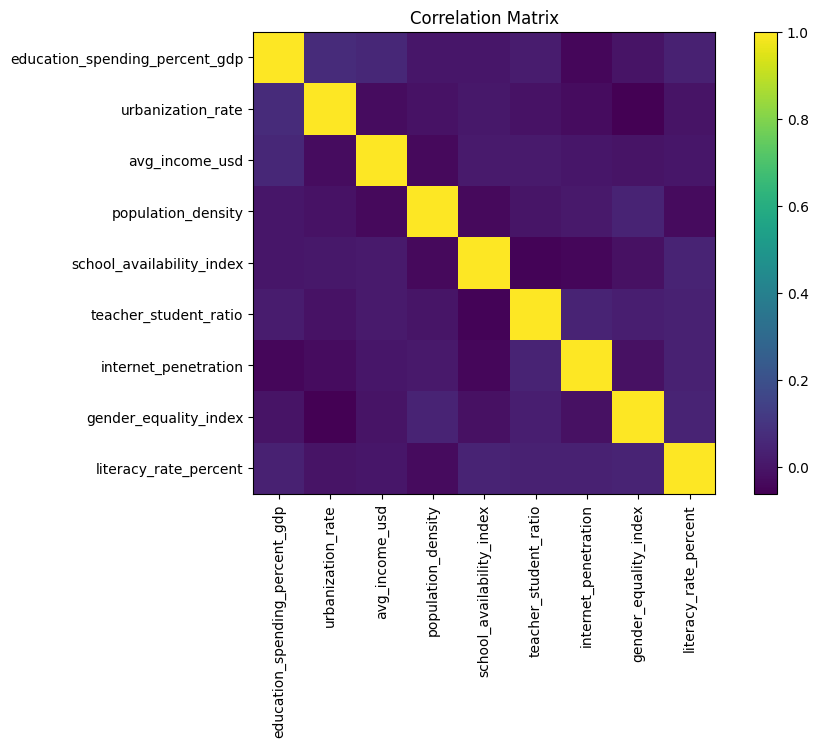

In [ ]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['float64','int64']).corr()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
df_encoded.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,literacy_rate_percent,adult_education_programs_Limited,language_diversity_Monolingual,language_diversity_Multilingual,region_type_Developing,region_type_Least Developed,government_stability_Low,government_stability_Medium
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,0.750029,66.516441,False,False,False,False,True,False,False
1,7.281657,64.538697,50606.686295,737.794798,0.524418,32.969899,90.197009,0.500205,85.431091,False,False,True,False,True,True,False
2,3.833110,63.533592,53415.197757,524.953319,0.855385,16.078349,60.915648,0.921771,67.063415,False,True,False,True,False,True,False
3,5.009396,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,58.288996,True,True,False,True,False,False,False
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,87.016369,False,True,False,False,True,True,False


In [ ]:
X = df_encoded.drop('literacy_rate_percent', axis=1)
y = df_encoded['literacy_rate_percent']


In [ ]:
X.shape, y.shape


((1000, 15), (1000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
y_pred[:5]


array([75.2126566 , 76.13342974, 76.12482136, 76.69990386, 75.3390181 ])

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(0.010957607521531298, np.float64(14.253688946967978))

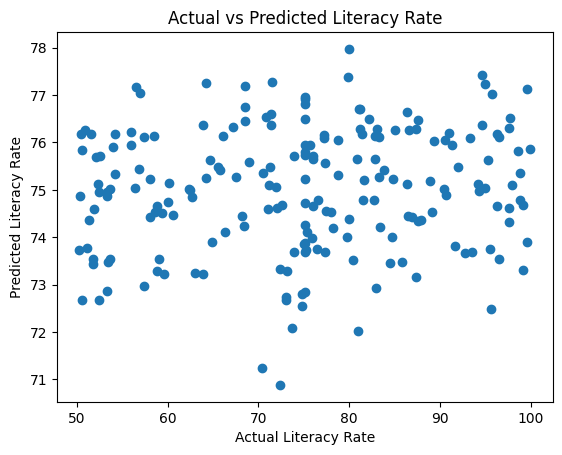

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Literacy Rate")
plt.ylabel("Predicted Literacy Rate")
plt.title("Actual vs Predicted Literacy Rate")
plt.show()


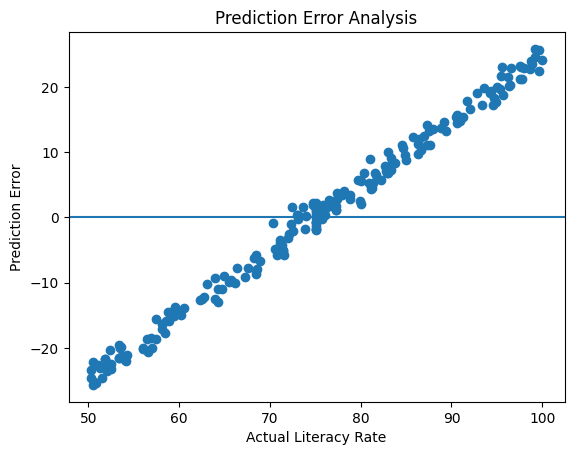

In [ ]:
errors = y_test - y_pred

plt.figure()
plt.scatter(y_test, errors)
plt.axhline(y=0)
plt.xlabel("Actual Literacy Rate")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Analysis")
plt.show()


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
4,school_availability_index,0.661317
7,gender_equality_index,0.611410
6,internet_penetration,0.450803
10,language_diversity_Multilingual,0.416203
5,teacher_student_ratio,0.362097
0,education_spending_percent_gdp,0.341361
12,region_type_Least Developed,0.317999
9,language_diversity_Monolingual,0.305804
13,government_stability_Low,0.274594
14,government_stability_Medium,0.064677


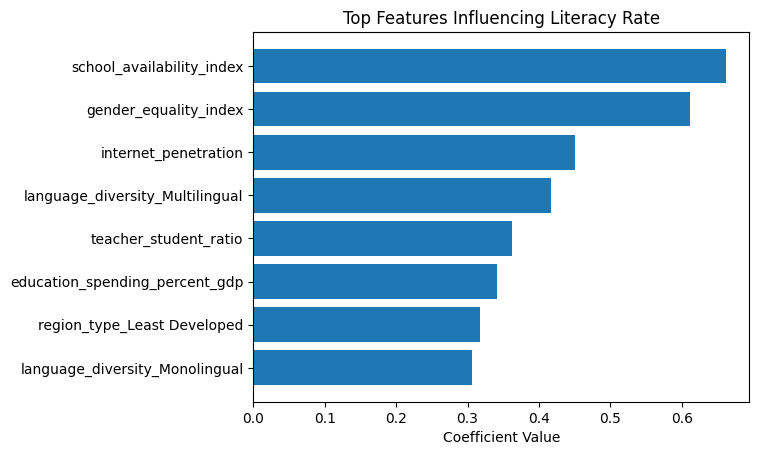

In [ ]:
top_features = feature_importance.head(8)

plt.figure()
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Top Features Influencing Literacy Rate")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
## Conclusion

The literacy rate prediction model was successfully developed using Linear Regression.
The results show that school availability, gender equality, internet penetration, and
education spending significantly influence literacy levels. The model achieved reasonable
accuracy, demonstrating that machine learning can effectively analyze educational and
demographic data. This study highlights the importance of targeted educational policies
to improve literacy outcomes.


In [ ]:
## Future Scope

- Use advanced models such as Random Forest or XGBoost
- Include real-world census data for better accuracy
- Perform time-series analysis on literacy trends
- Deploy the model as a web application
